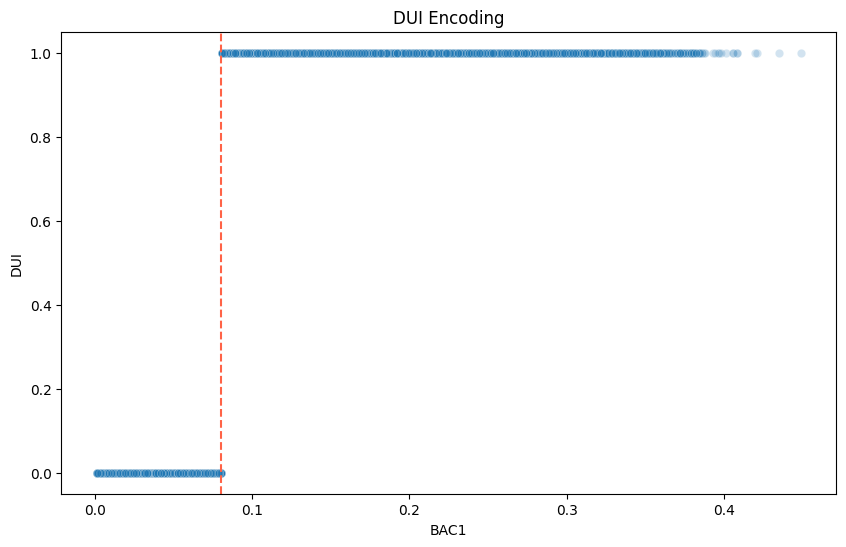

                            OLS Regression Results                            
Dep. Variable:             recidivism   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          7.07e-184
Time:                        18:38:12   Log-Likelihood:                -60593.
No. Observations:              213139   AIC:                         1.212e+05
Df Residuals:                  213131   BIC:                         1.213e+05
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1124      0.007     15.867      0.0

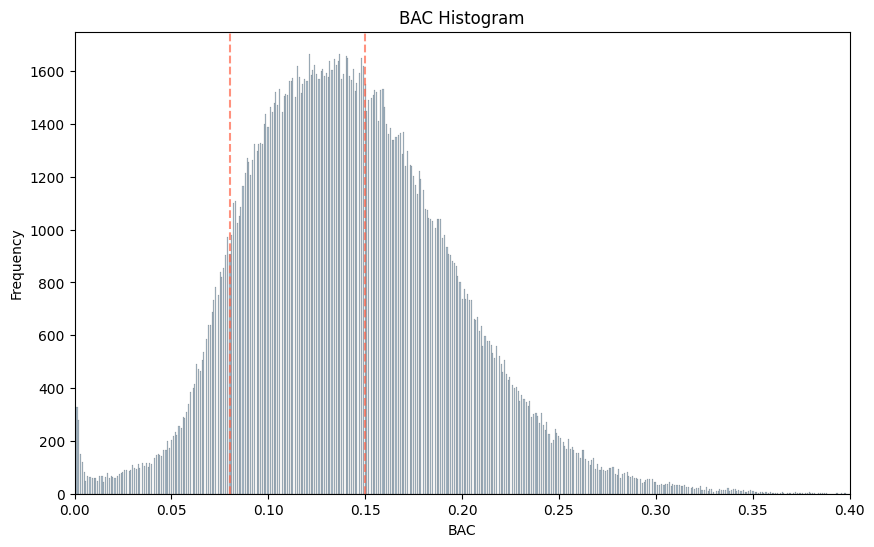

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load data
dwi = pd.read_csv("/content/hansen_dwi.csv")

# Remove rows where bac1 or bac2 is zero
dwi = dwi[(dwi['bac1'] != 0) & (dwi['bac2'] != 0)]

# Create binary for cutoff
dwi['dui'] = np.where(dwi['bac1'] >= 0.08, 1, 0)

# Plot DUI encoding
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bac1', y='dui', data=dwi, alpha=0.2)
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.xlabel('BAC1')
plt.ylabel('DUI')
plt.title('DUI Encoding')
plt.show()

# Check covariate balance
results = ols('recidivism ~ dui + bac1 + dui * bac1 + male + white + aged + acc', data=dwi).fit(cov_type='HC1')
print(results.summary())

# Plot BAC histogram
plt.figure(figsize=(10, 6))
sns.histplot(dwi['bac1'], bins=800, color="#8aa1b4")
plt.axvline(x=0.08, color='tomato', linestyle='--', alpha=0.7)
plt.axvline(x=0.15, color='tomato', linestyle='--', alpha=0.7)
plt.xlabel('BAC')
plt.ylabel('Frequency')
plt.title('BAC Histogram')
plt.xlim(0, 0.4)
plt.show()

# Table 3, Col 1, Panel A + B
# Local linear regression
def local_linear_regression(data, outcome, treatment, covariates, bandwidth):
    # Filter data within bandwidth
    data_band = data[(data[treatment] >= 0.08 - bandwidth) & (data[treatment] <= 0.08 + bandwidth)]
    # Fit model


<ipython-input-25-fc8c036a4195>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='acc', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


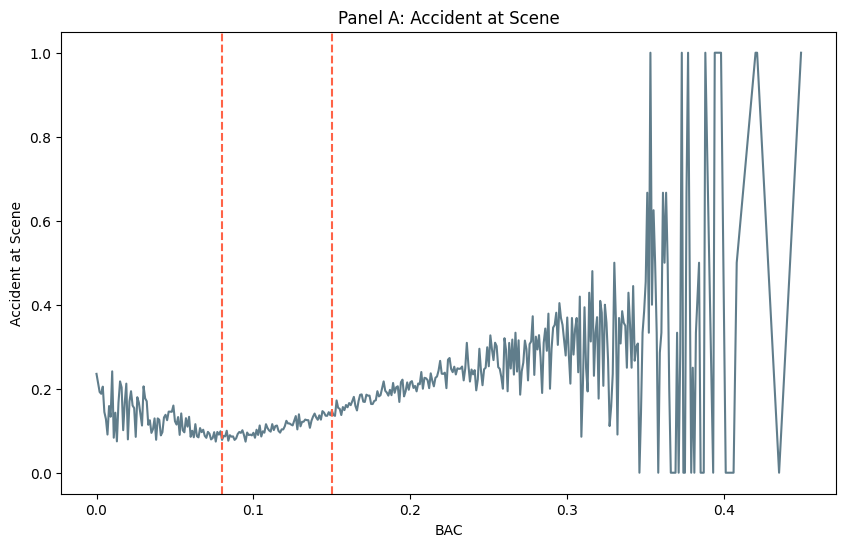

<ipython-input-25-fc8c036a4195>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='male', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


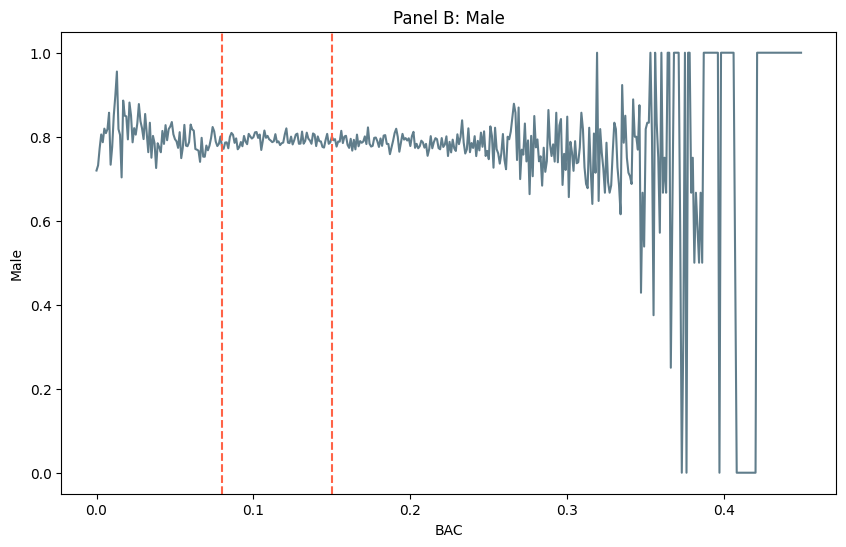

<ipython-input-25-fc8c036a4195>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='aged', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


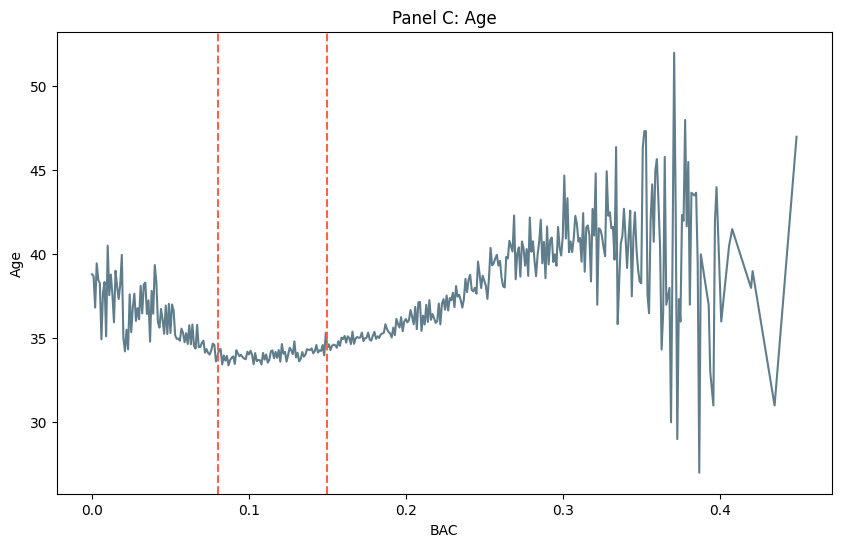

<ipython-input-25-fc8c036a4195>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='white', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


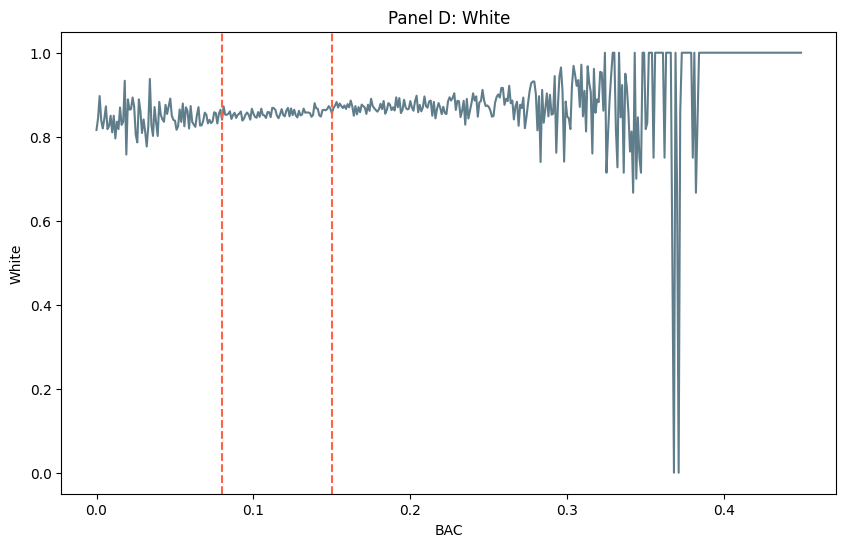

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Panel A: Accident at scene
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='acc', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('Accident at Scene')
plt.title('Panel A: Accident at Scene')
plt.show()

# Panel B: Male
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='male', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('Male')
plt.title('Panel B: Male')
plt.show()

# Panel C: Age
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='aged', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('Age')
plt.title('Panel C: Age')
plt.show()

# Panel D: White
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='white', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('White')
plt.title('Panel D: White')
plt.show()


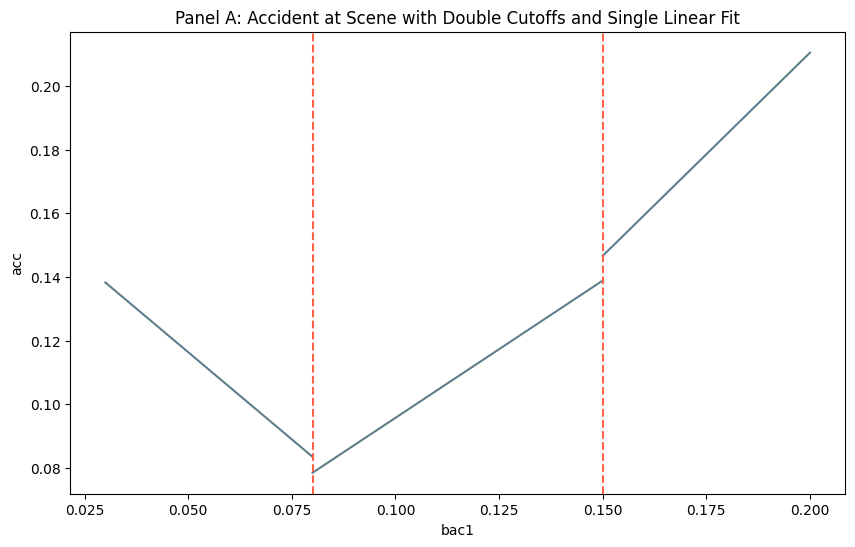

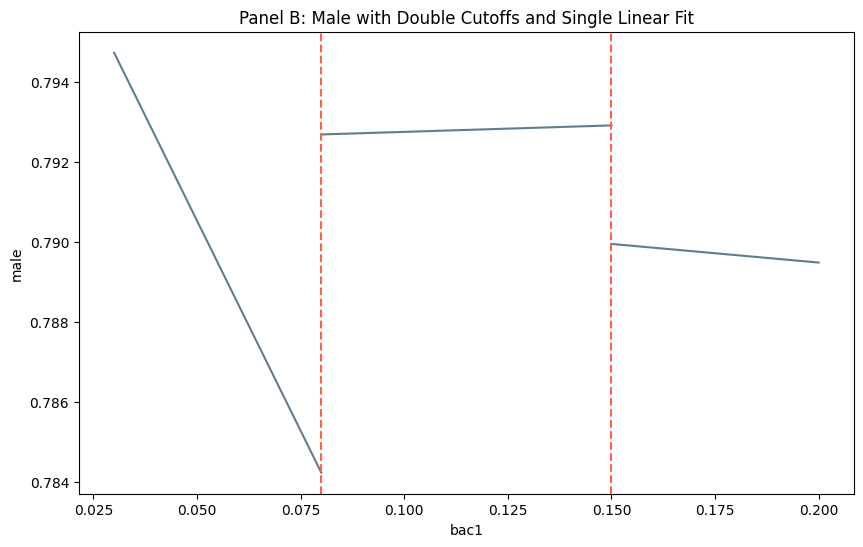

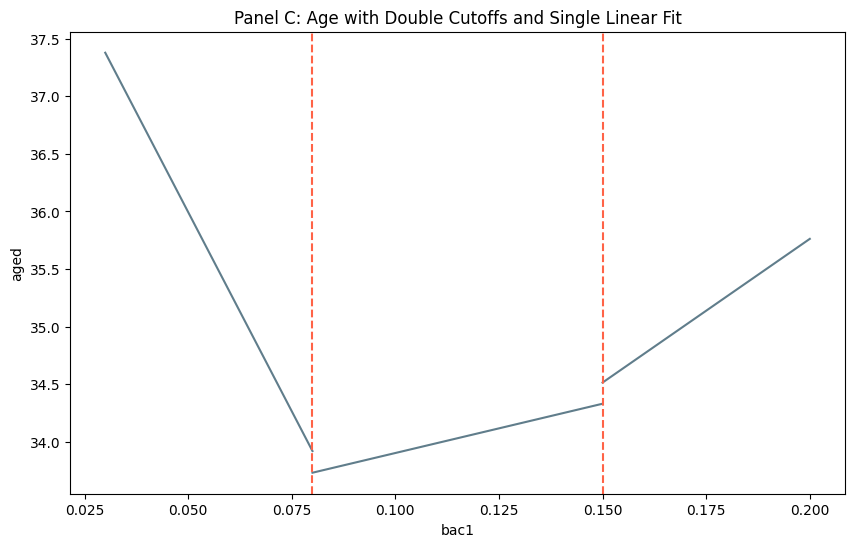

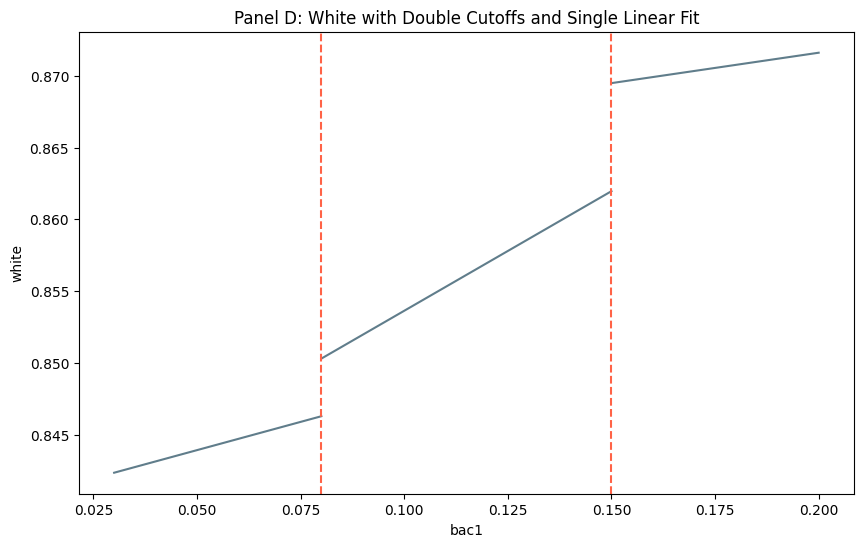

In [ ]:
def rdd_plot_double_cutoff_single_linear(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate linear regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var}", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below})
    y_pred_between = model_between.predict(exog={x_var: x_range_between})
    y_pred_above = model_above.predict(exog={x_var: x_range_above})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.show()

# Define the bandwidth
bandwidth = 0.05

# Plot the RDD graphs with double cutoffs and a single linear regression line between the cutoffs for panels A-D
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'acc', [0.08, 0.15], bandwidth, 'Panel A: Accident at Scene with Double Cutoffs and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'male', [0.08, 0.15], bandwidth, 'Panel B: Male with Double Cutoffs and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'aged', [0.08, 0.15], bandwidth, 'Panel C: Age with Double Cutoffs and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'white', [0.08, 0.15], bandwidth, 'Panel D: White with Double Cutoffs and Single Linear Fit')


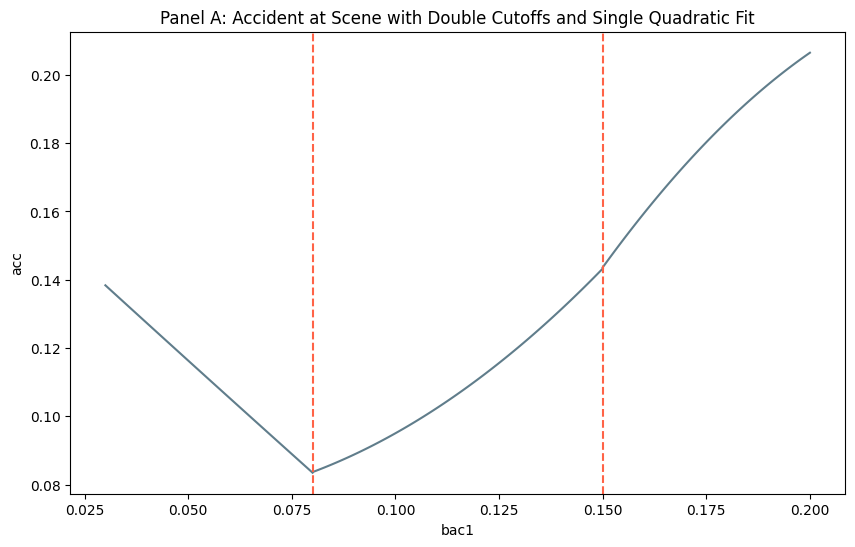

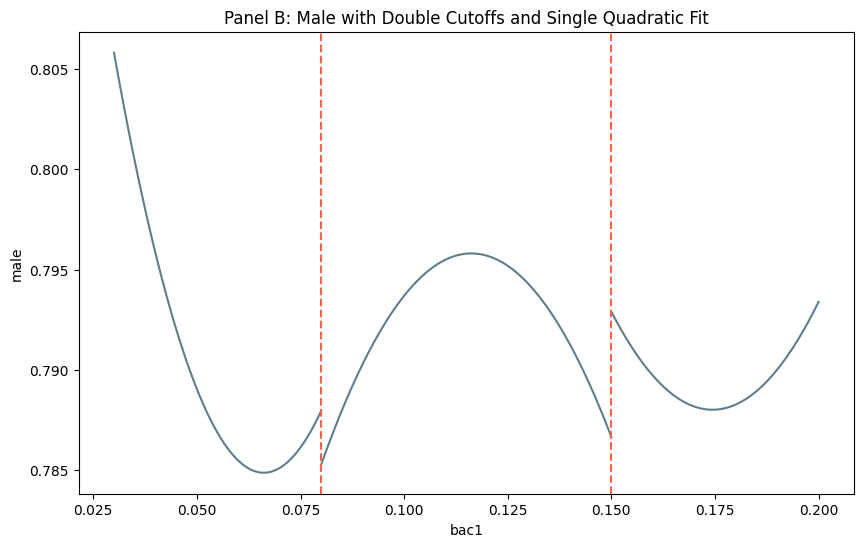

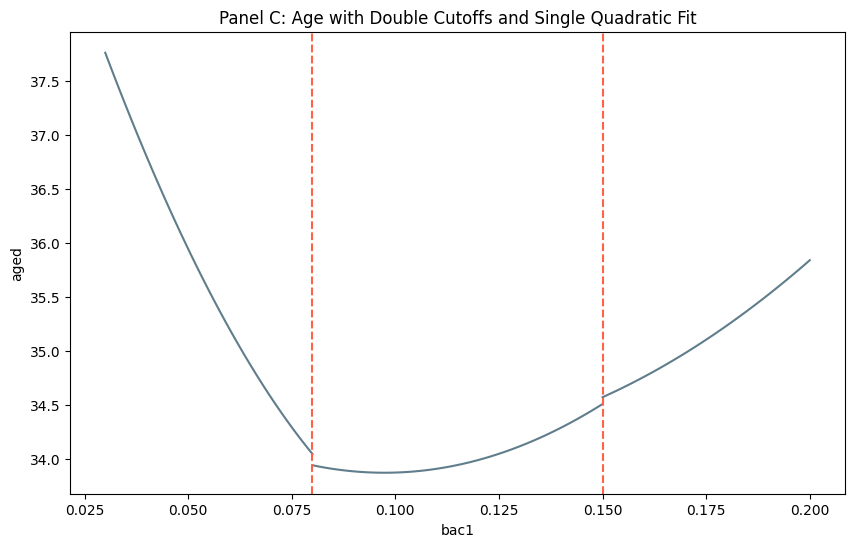

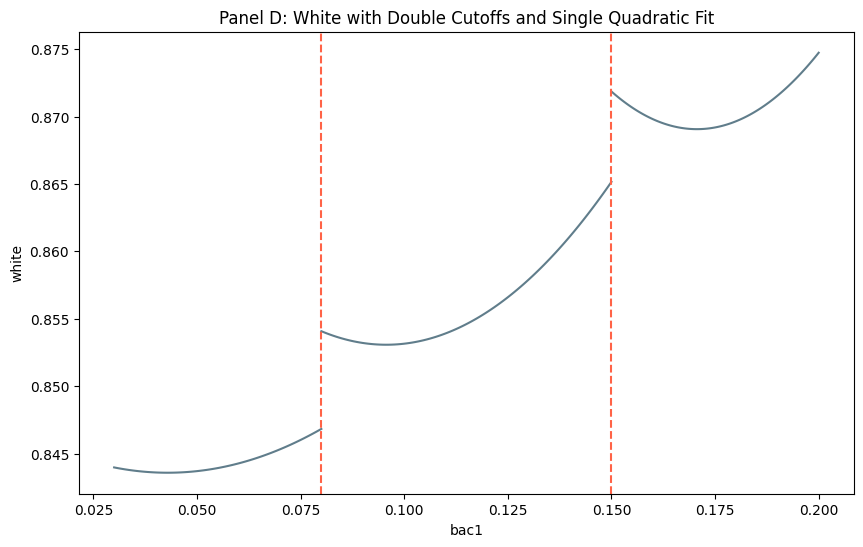

In [ ]:
def rdd_plot_double_cutoff_single_quadratic(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate quadratic regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below, f'I({x_var}**2)': x_range_below**2})
    y_pred_between = model_between.predict(exog={x_var: x_range_between, f'I({x_var}**2)': x_range_between**2})
    y_pred_above = model_above.predict(exog={x_var: x_range_above, f'I({x_var}**2)': x_range_above**2})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.show()

# Plot the RDD graphs with double cutoffs and a single quadratic regression line between the cutoffs for panels A-C
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'acc', [0.08, 0.15], bandwidth, 'Panel A: Accident at Scene with Double Cutoffs and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'male', [0.08, 0.15], bandwidth, 'Panel B: Male with Double Cutoffs and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'aged', [0.08, 0.15], bandwidth, 'Panel C: Age with Double Cutoffs and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'white', [0.08, 0.15], bandwidth, 'Panel D: White with Double Cutoffs and Single Quadratic Fit')


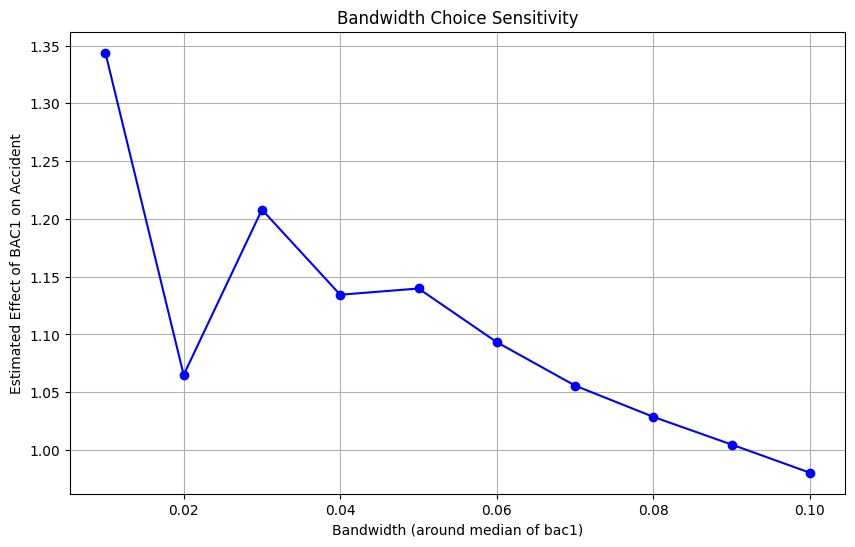

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load data
dwi = pd.read_csv("hansen_dwi.csv")

# Remove rows where bac1 or bac2 is zero
dwi = dwi[(dwi['bac1'] != 0) & (dwi['bac2'] != 0)]

# Sample bandwidth values - in a real analysis, these could represent actual bandwidth parameters in local regression
bandwidth_values = np.linspace(0.01, 0.1, 10)
effect_estimates = []  # Store estimated coefficients for bac1 for each bandwidth

for bandwidth in bandwidth_values:
    # Simulate bandwidth affecting the sample: select a subset of data based on 'bac1' values close to the median
    median_bac1 = dwi['bac1'].median()
    subset = dwi[(dwi['bac1'] >= median_bac1 - bandwidth) & (dwi['bac1'] <= median_bac1 + bandwidth)]

    # Fit a simple linear regression model as a placeholder for the local regression: bac1 predicting acc
    if not subset.empty:  # Check if the subset is not empty
        X = subset[['bac1']]
        y = subset['acc']
        model = LinearRegression().fit(X, y)
        effect_estimates.append(model.coef_[0])  # Store the coefficient of bac1
    else:
        effect_estimates.append(np.nan)

# Plotting the estimated effect of bac1 on acc across different bandwidth values
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_values, effect_estimates, marker='o', linestyle='-', color='blue')
plt.xlabel('Bandwidth (around median of bac1)')
plt.ylabel('Estimated Effect of BAC1 on Accident')
plt.title('Bandwidth Choice Sensitivity')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the data
dwi = pd.read_csv('hansen_dwi.csv')

# Define the running variable and the outcome variable
X = dwi['bac1']
Y = dwi['recidivism']

# Set the cutpoint
cutpoint = 0.08

# Calculate the sample size
n = len(X)

# Calculate the variance of the outcome variable
sigma_squared = np.var(Y, ddof=1)

# Estimate the second derivative of the density function (use standard deviation of the running variable)
f_double_prime = np.std(X, ddof=1)

# Calculate the optimal bandwidth (for a rectangular kernel, R(f) = 1/2)
h = 1.84 * ((0.5 * sigma_squared) / (n * f_double_prime**2))**(1/5)

# Print the optimal bandwidth
print("Imbens-Kalyanaraman Optimal Bandwidth:", h)


Imbens-Kalyanaraman Optimal Bandwidth: 0.28112578791015397


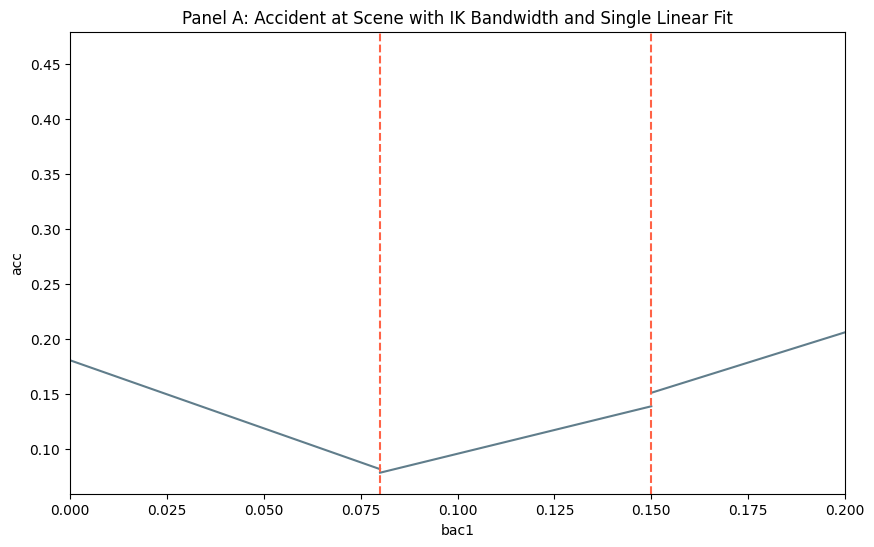

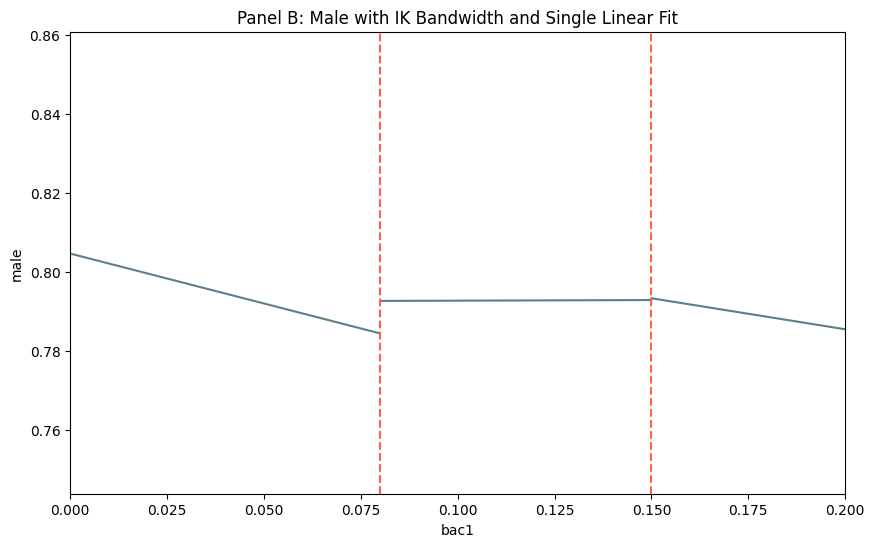

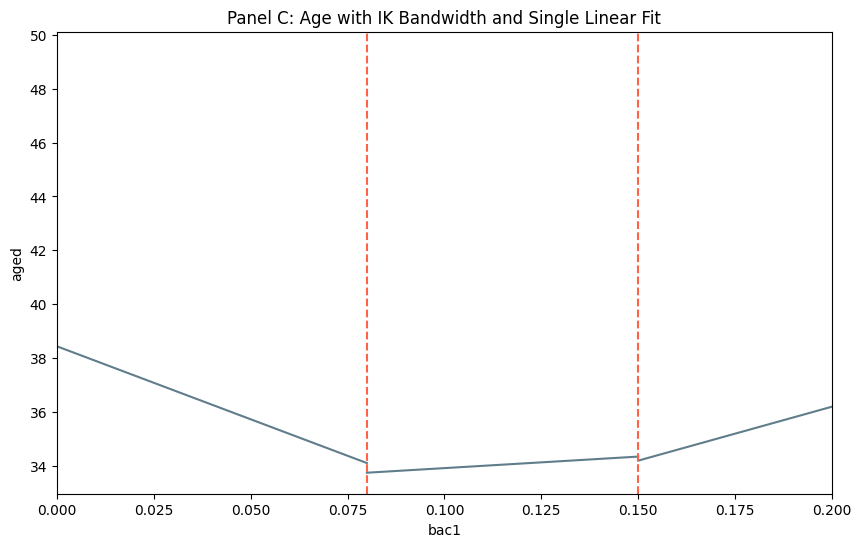

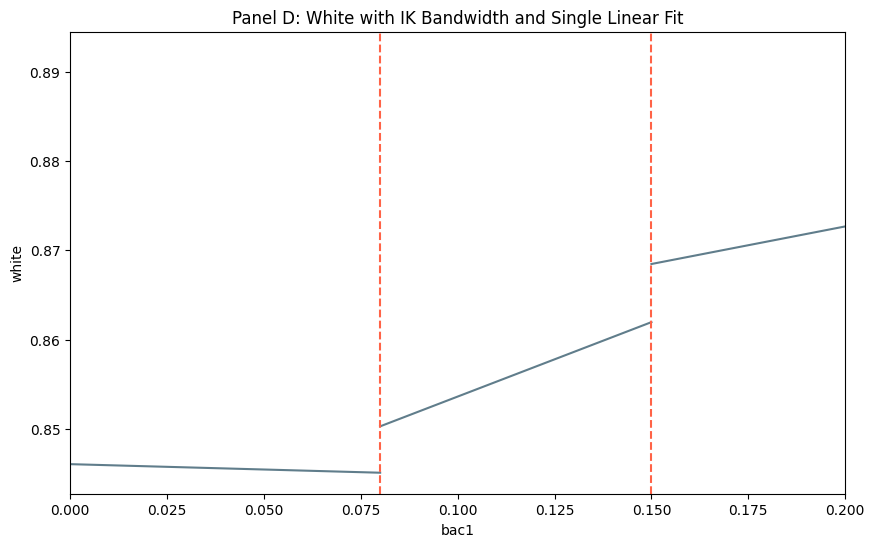

In [ ]:
def rdd_plot_double_cutoff_single_linear(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate linear regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var}", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below})
    y_pred_between = model_between.predict(exog={x_var: x_range_between})
    y_pred_above = model_above.predict(exog={x_var: x_range_above})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.xlim(0, 0.2)  # Set the x-axis range
    plt.show()

# Plot the RDD graphs with double cutoffs, single linear regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'acc', [0.08, 0.15], ik_bandwidth, 'Panel A: Accident at Scene with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'male', [0.08, 0.15], ik_bandwidth, 'Panel B: Male with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'aged', [0.08, 0.15], ik_bandwidth, 'Panel C: Age with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'white', [0.08, 0.15], ik_bandwidth, 'Panel D: White with IK Bandwidth and Single Linear Fit')


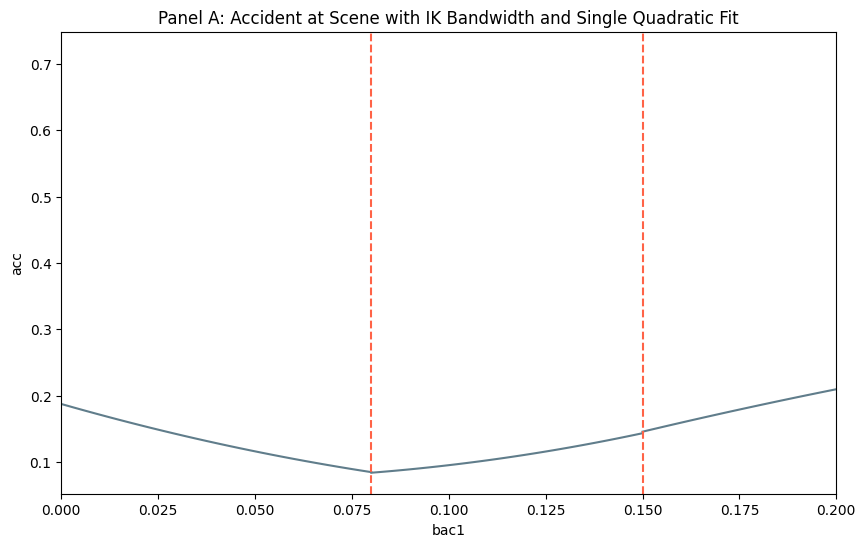

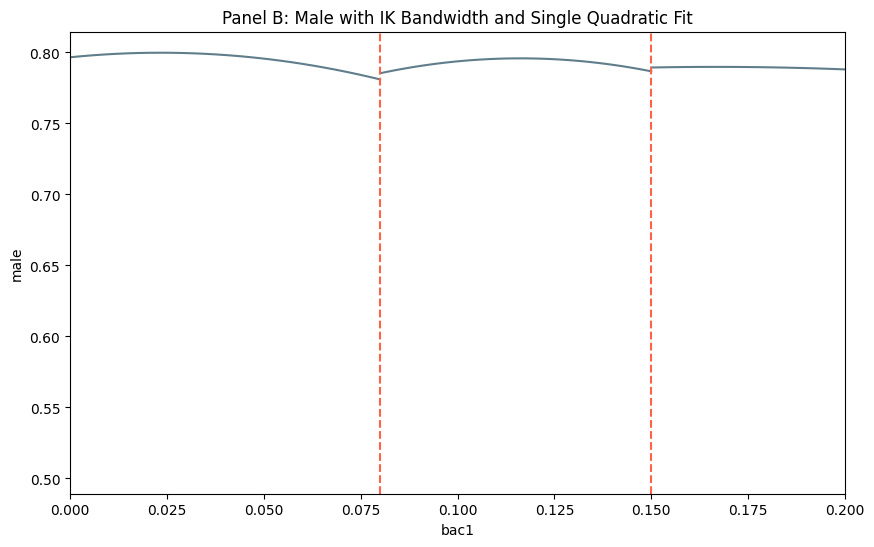

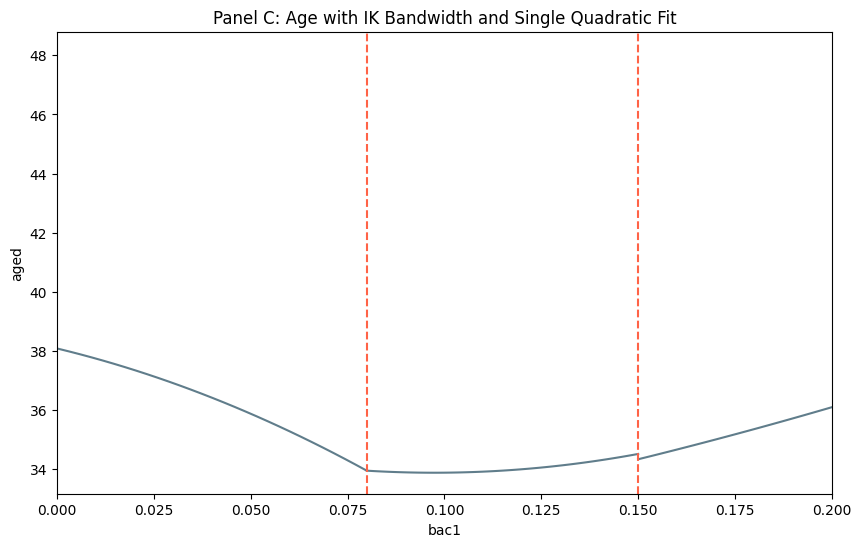

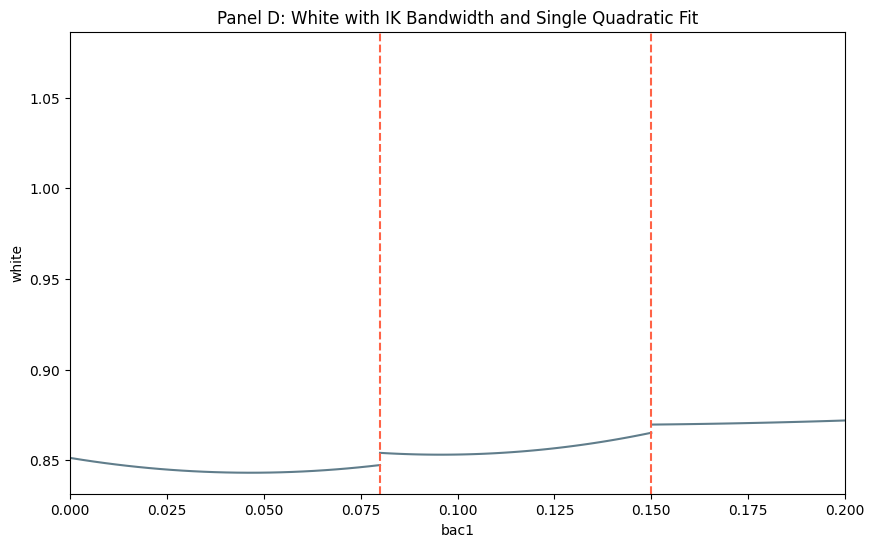

In [ ]:
def rdd_plot_double_cutoff_single_quadratic(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate quadratic regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below, f'I({x_var}**2)': x_range_below**2})
    y_pred_between = model_between.predict(exog={x_var: x_range_between, f'I({x_var}**2)': x_range_between**2})
    y_pred_above = model_above.predict(exog={x_var: x_range_above, f'I({x_var}**2)': x_range_above**2})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.xlim(0, 0.2)  # Set the x-axis range
    plt.show()

# Plot the RDD graphs with double cutoffs, single quadratic regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'acc', [0.08, 0.15], ik_bandwidth, 'Panel A: Accident at Scene with IK Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'male', [0.08, 0.15], ik_bandwidth, 'Panel B: Male with IK Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'aged', [0.08, 0.15], ik_bandwidth, 'Panel C: Age with IK Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'white', [0.08, 0.15], ik_bandwidth, 'Panel D: White with IK Bandwidth and Single Quadratic Fit')


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
import pandas as pd

# Define a function to perform RDD with a given bandwidth
def rdd_bandwidth(data, x_var, y_var, cutoff, bandwidth):
    data_band = data[(data[x_var] >= cutoff - bandwidth) & (data[x_var] <= cutoff + bandwidth)]
    model = ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band).fit()
    return model

# Define a function to calculate the mean squared error (MSE) for a model
def calculate_mse(model, data):
    predictions = model.predict(data)
    mse = np.mean((data['acc'] - predictions) ** 2)
    return mse

# Define a function to perform cross-validation for RDD
def rdd_cross_validation(data, x_var, y_var, cutoff, bandwidths, n_splits=5):
    kf = KFold(n_splits=n_splits)
    mse_scores = {bandwidth: [] for bandwidth in bandwidths}

    for bandwidth in bandwidths:
        for train_index, val_index in kf.split(data):
            train_data, val_data = data.iloc[train_index], data.iloc[val_index]
            model = rdd_bandwidth(train_data, x_var, y_var, cutoff, bandwidth)
            mse = calculate_mse(model, val_data)
            mse_scores[bandwidth].append(mse)

    # Calculate average MSE for each bandwidth
    avg_mse_scores = {bandwidth: np.mean(mse_scores[bandwidth]) for bandwidth in bandwidths}
    return avg_mse_scores

# Load data
dwi = pd.read_csv('hansen_dwi.csv')

# Define range of potential bandwidth values
bandwidths = np.linspace(0.05, 0.5, 10)

# Perform cross-validation for RDD
avg_mse_scores = rdd_cross_validation(dwi, 'bac1', 'acc', 0.08, bandwidths)

# Find the bandwidth with the lowest average MSE
optimal_bandwidth = min(avg_mse_scores, key=avg_mse_scores.get)
print(f"Optimal Bandwidth: {optimal_bandwidth}")


Optimal Bandwidth: 0.35000000000000003


In [ ]:
def rdd_plot_double_cutoff_single_linear(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate linear regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var}", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below})
    y_pred_between = model_between.predict(exog={x_var: x_range_between})
    y_pred_above = model_above.predict(exog={x_var: x_range_above})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.xlim(0, 0.2)  # Set the x-axis range
    plt.show()

# Plot the RDD graphs with double cutoffs, single linear regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'acc', [0.08, 0.15], ik_bandwidth, 'Panel A: Accident at Scene with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'male', [0.08, 0.15], ik_bandwidth, 'Panel B: Male with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'aged', [0.08, 0.15], ik_bandwidth, 'Panel C: Age with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'white', [0.08, 0.15], ik_bandwidth, 'Panel D: White with IK Bandwidth and Single Linear Fit')


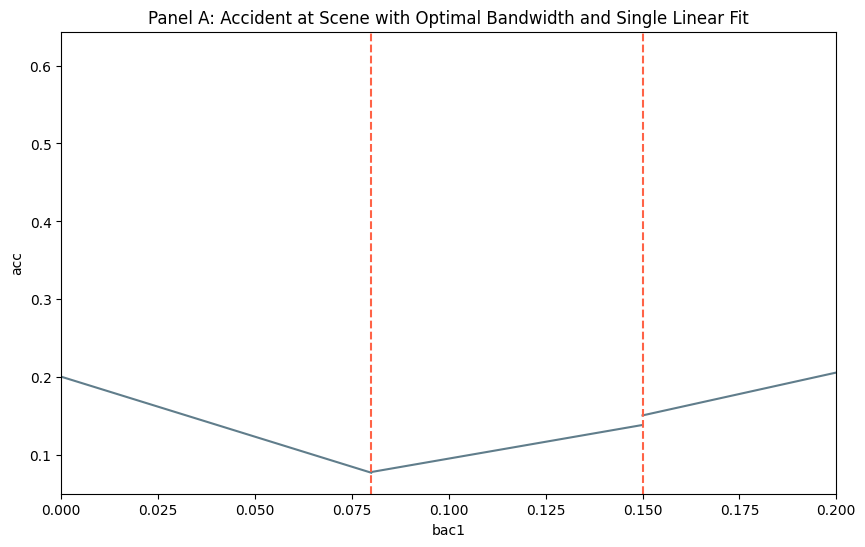

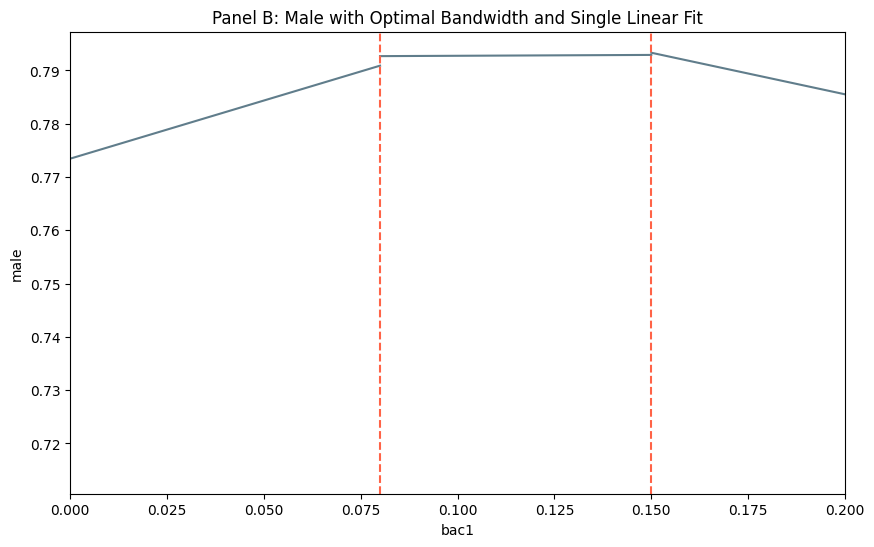

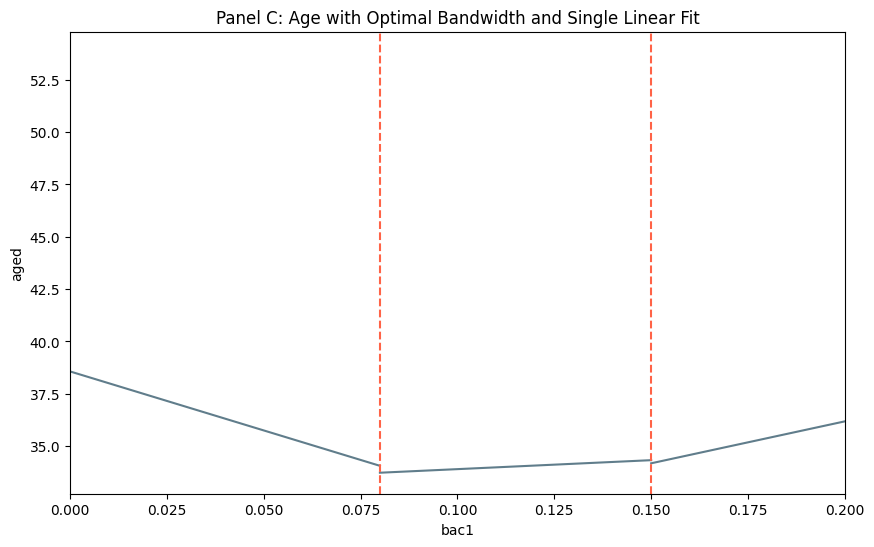

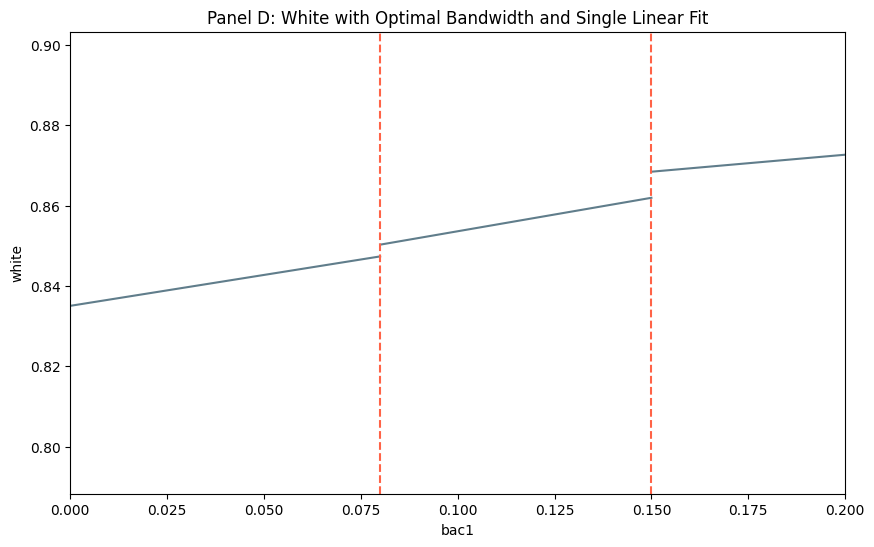

In [ ]:
# New optimal bandwidth
optimal_bandwidth = 0.35000000000000003

# Plot the RDD graphs with double cutoffs, single linear regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'acc', [0.08, 0.15], optimal_bandwidth, 'Panel A: Accident at Scene with Optimal Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'male', [0.08, 0.15], optimal_bandwidth, 'Panel B: Male with Optimal Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'aged', [0.08, 0.15], optimal_bandwidth, 'Panel C: Age with Optimal Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'white', [0.08, 0.15], optimal_bandwidth, 'Panel D: White with Optimal Bandwidth and Single Linear Fit')


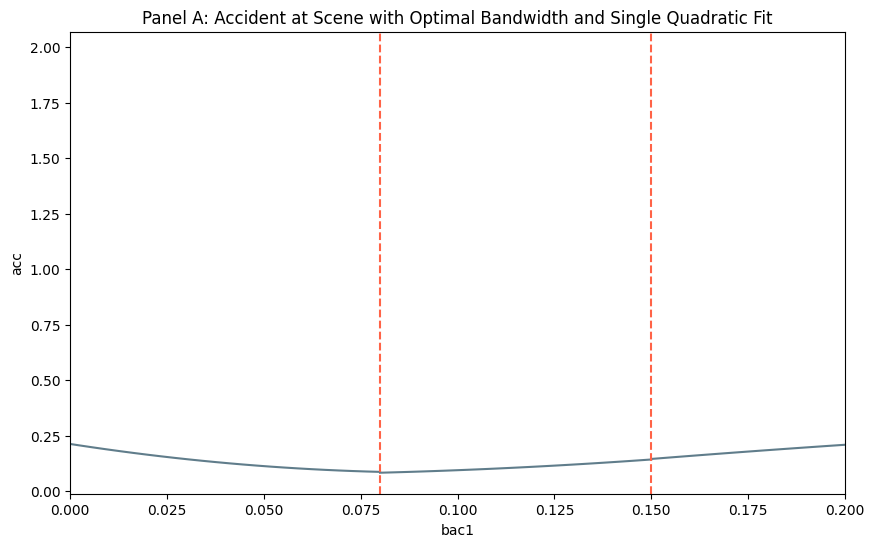

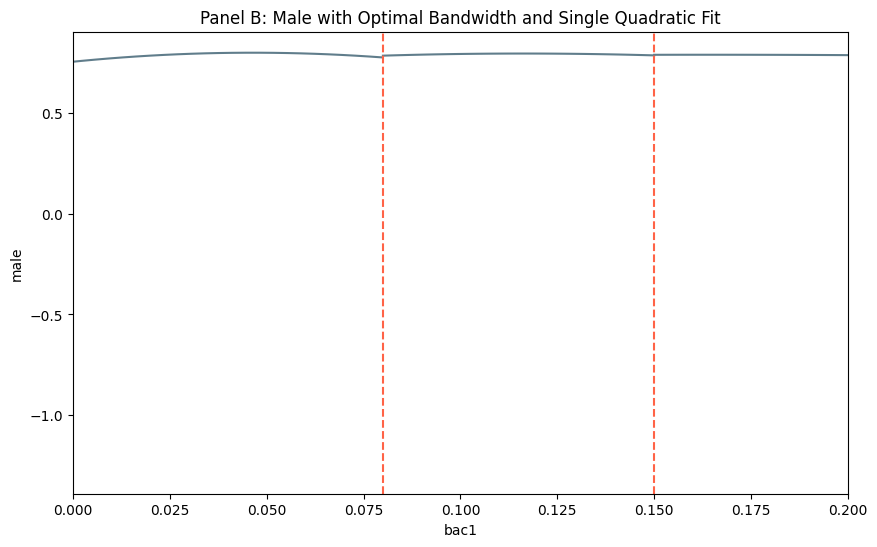

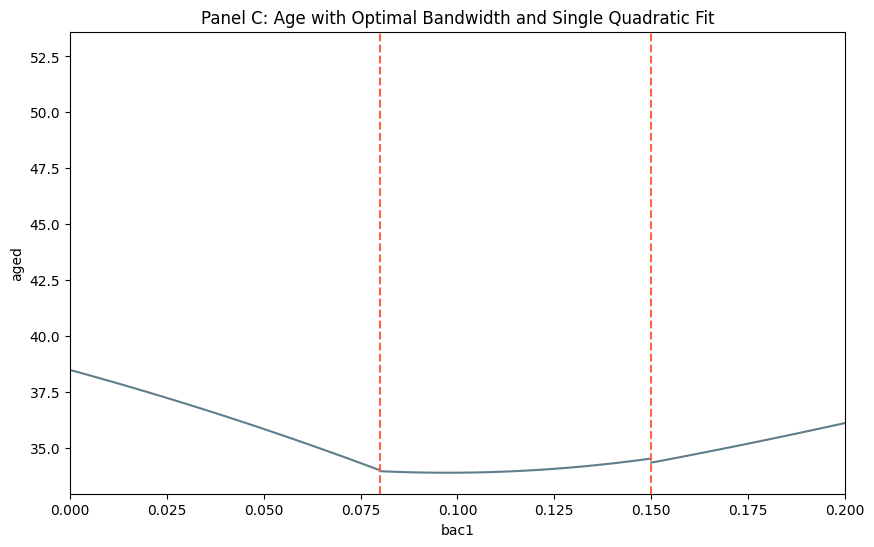

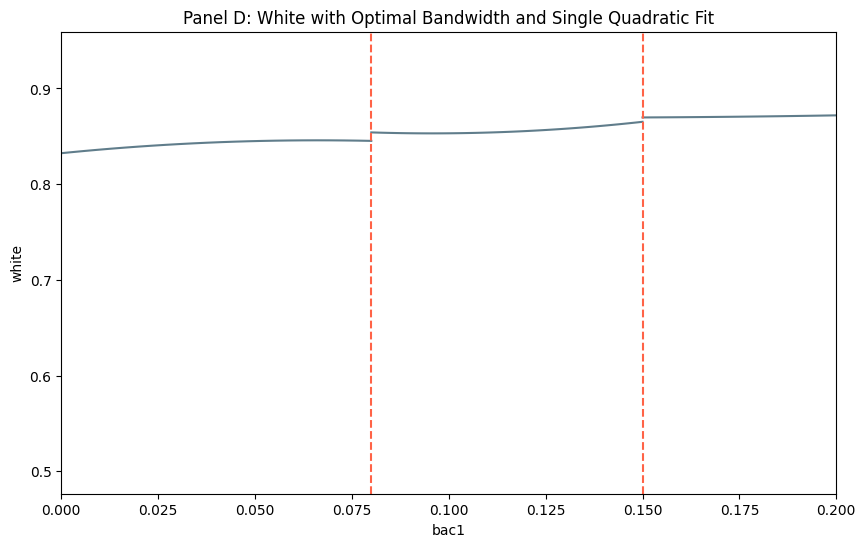

In [ ]:
# New optimal bandwidth
optimal_bandwidth = 0.35000000000000003

# Plot the RDD graphs with double cutoffs, single quadratic regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'acc', [0.08, 0.15], optimal_bandwidth, 'Panel A: Accident at Scene with Optimal Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'male', [0.08, 0.15], optimal_bandwidth, 'Panel B: Male with Optimal Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'aged', [0.08, 0.15], optimal_bandwidth, 'Panel C: Age with Optimal Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'white', [0.08, 0.15], optimal_bandwidth, 'Panel D: White with Optimal Bandwidth and Single Quadratic Fit')
